# Packages importing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("autompg.csv")

# Data preprocessing

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df.shape

(398, 9)

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [9]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
print("mean Car milleage:",round(df["mpg"].mean()))
print("median Car milleage:",round(df["mpg"].median()))
print("highest Car milleage:",round(df["mpg"].max()))
print("lowest Car milleage:",round(df["mpg"].min()))

mean Car milleage: 24
median Car milleage: 23
highest Car milleage: 47
lowest Car milleage: 9


# Data visualization

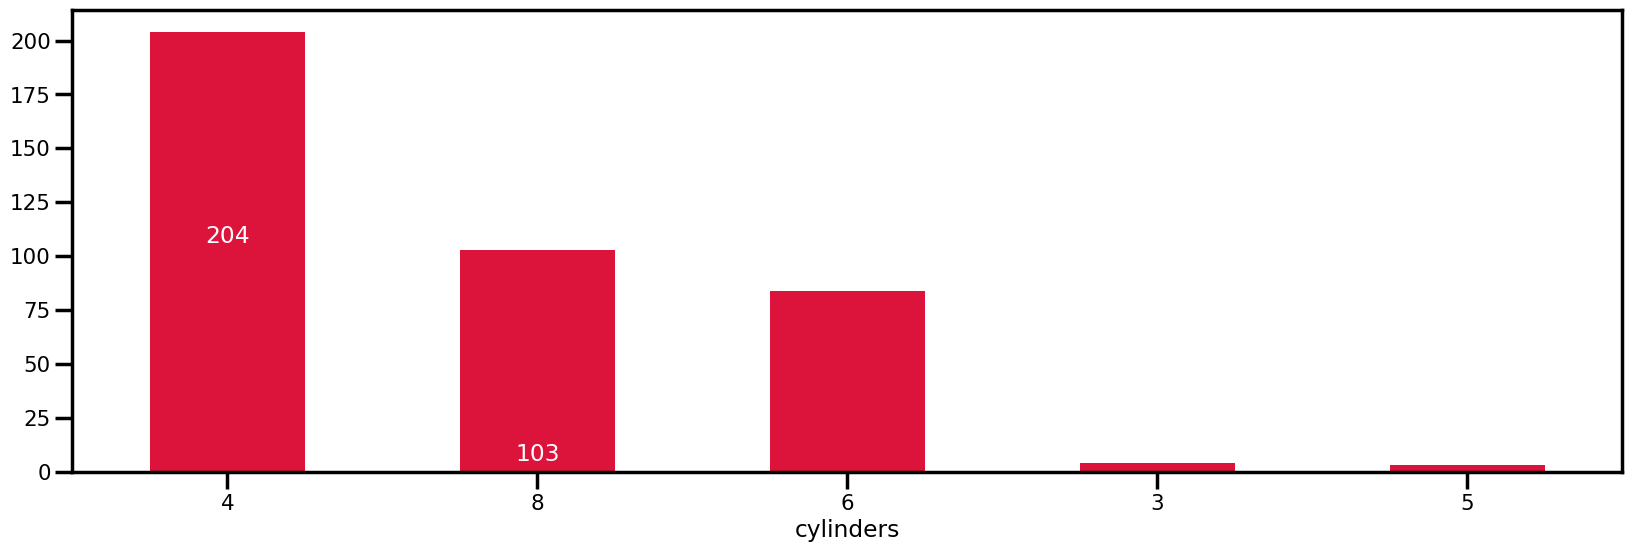

In [11]:
sns.set_context("poster",font_scale= .7)
plt.figure(figsize=(20, 6))
ax= df["cylinders"].value_counts().plot(kind="bar",color="crimson",rot=0)
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()-100),
                ha="center",va="bottom",color="white")

In [12]:
#Deep copy,Shallow Copy
data_shallow = df

# Outlier detection

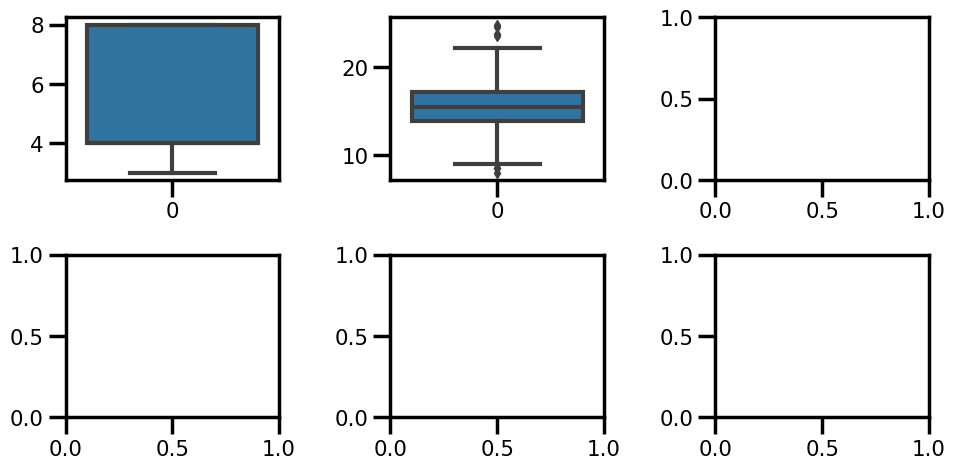

In [13]:
fig, axs = plt.subplots(2,3, figsize=(10,5))
plt1 = sns.boxplot(data_shallow['cylinders'],ax=axs[0,0])
plt2 = sns.boxplot(data_shallow['acceleration'],ax=axs[0,1])
plt.tight_layout()

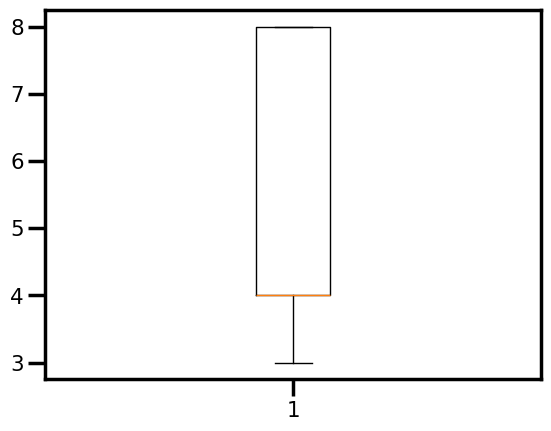

In [14]:
plt.boxplot(df.cylinders)
Q1= df.cylinders.quantile(0.25)
Q3= df.cylinders.quantile(0.75)
IQR=Q3-Q1
housing = df[(df.cylinders >= Q1 - 1.5*IQR)&(df.cylinders <= Q3 + 1.5* IQR)]

# Model building

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import category_encoders as ce

In [16]:
#split the dataset
X=df.drop(columns="mpg")
y=df["mpg"]

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 25.0+ KB


In [41]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [17]:
encoder = ce.LeaveOneOutEncoder()
x=encoder.fit_transform(X,y)

In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


# Training the model

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=40)

In [19]:
model_rfr = RandomForestRegressor(n_estimators=7)
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()

In [20]:
models=[model_rfr,model_dt,model_lr]

In [21]:
for model in models:
    print(f"fitting model: {model}")
    model.fit(x_train,y_train)

fitting model: RandomForestRegressor(n_estimators=7)
fitting model: DecisionTreeRegressor()
fitting model: LinearRegression()


In [22]:
for model in models:
    print(f"score of {model} for training data: {model.score(x_train,y_train)}")

score of RandomForestRegressor(n_estimators=7) for training data: 0.9781179219376127
score of DecisionTreeRegressor() for training data: 1.0
score of LinearRegression() for training data: 0.835790011616185


In [23]:
for model in models:
    print(f"score of {model} for testing data: {model.score(x_test,y_test)}")

score of RandomForestRegressor(n_estimators=7) for testing data: 0.9243917129328784
score of DecisionTreeRegressor() for testing data: 0.8358067439509265
score of LinearRegression() for testing data: 0.8507919302271506


In [24]:
for model in models[:]:
    y_predicted = model.predict(x_test)
    print(f"Report:{model}")

Report:RandomForestRegressor(n_estimators=7)
Report:DecisionTreeRegressor()
Report:LinearRegression()


# Feature selection

In [25]:
fs = model_rfr.feature_importances_
feature_names = x.columns

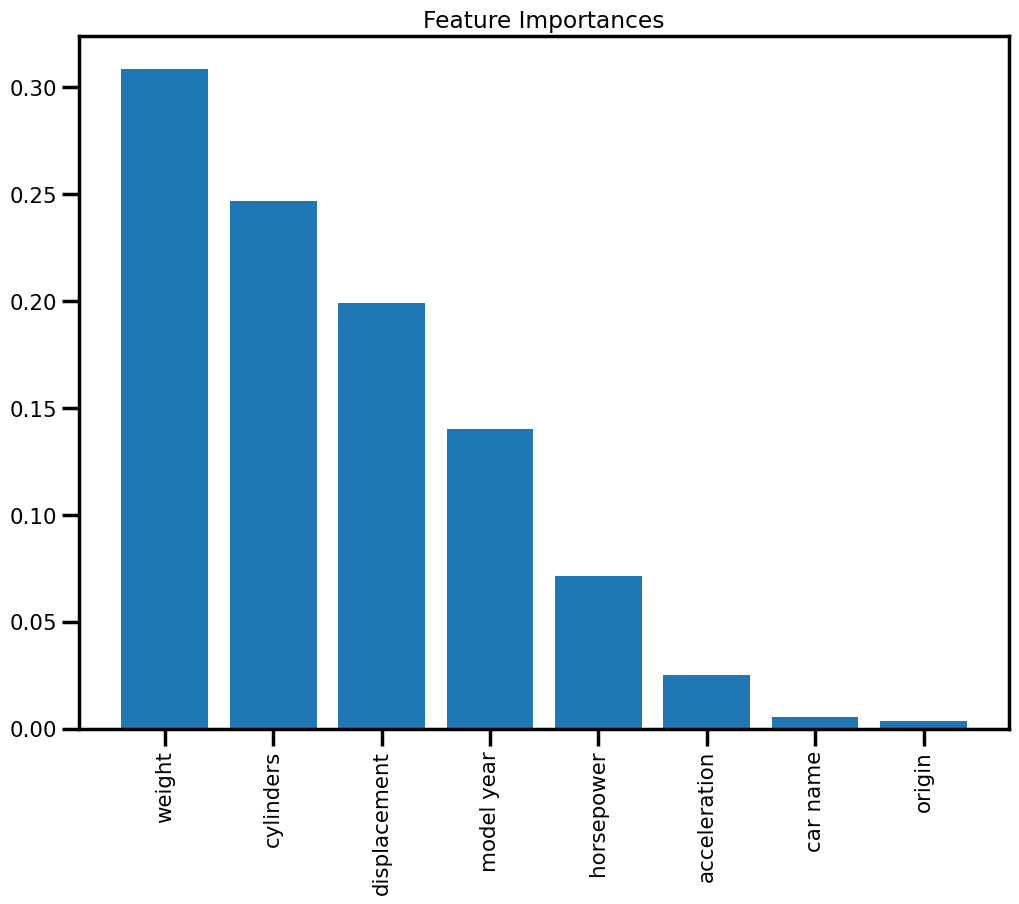

In [26]:
feature_importances = pd.DataFrame(fs,feature_names).sort_values(by=0,ascending=False)
plt.figure(figsize=(12, 9))
plt.title("Feature Importances")
plt.bar(x=feature_importances.index,height=feature_importances[0])
plt.xticks(rotation=90)
plt.show()

In [27]:
feature_importances

,0
weight,0.308730
cylinders,0.246946
displacement,0.198999
model year,0.140089
horsepower,0.071360
acceleration,0.024926
car name,0.005200
origin,0.003750


In [28]:

def regression_results(y_true, y_pred):
    # Regression metrics
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error = None
    
    # Handling negative values
    if (y_true >= 0).all() and (y_pred >= 0).all():
        mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)

    r2 = metrics.r2_score(y_true, y_pred)

    results = {
        'r2': round(r2, 4),
        'MAE': round(mean_absolute_error, 4),
        'MSE': round(mse, 4),
        'RMSE': round(np.sqrt(mse), 4),
        'mean_squared_log_error': round(mean_squared_log_error, 4) if mean_squared_log_error is not None else "N/A"
    }
    
    return results

for model in models:
    y_predicted = model.predict(x_test)

    print(f"Report: {model}")
    results = regression_results(y_test, y_predicted)
    for metric, value in results.items():
        print(f'{metric}: {value}')
    print("\n")


Report: RandomForestRegressor(n_estimators=7)
r2: 0.9244
MAE: 1.6786
MSE: 4.9615
RMSE: 2.2274
mean_squared_log_error: 0.0074


Report: DecisionTreeRegressor()
r2: 0.8358
MAE: 2.185
MSE: 10.7745
RMSE: 3.2825
mean_squared_log_error: 0.0135


Report: LinearRegression()
r2: 0.8508
MAE: 2.5283
MSE: 9.7912
RMSE: 3.1291
mean_squared_log_error: 0.018


